# Voting Classifiers

In [1]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X, y = make_moons(n_samples=2500, noise=0.20)
x_zero = X[np.nonzero(y == 0)]
x_ones = X[np.nonzero(y)]

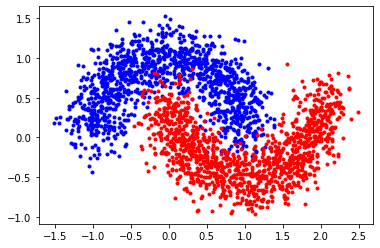

In [4]:
plt.plot(x_zero[:, 0], x_zero[:, 1], "b.")
plt.plot(x_ones[:, 0], x_ones[:, 1], "r.")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [6]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

In [7]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [8]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8848
RandomForestClassifier 0.9792
SVC 0.976
VotingClassifier 0.9776


# Bagging and Pasting in Scikit-Learn

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100, 
    bootstrap=True, 
    n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

0.968

# Out-of-Bag Evaluation

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9632

In [13]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9776

In [14]:
bag_clf.oob_decision_function_[:10]

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.92258065, 0.07741935],
       [1.        , 0.        ],
       [0.88135593, 0.11864407],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [15]:
y_train[:10].reshape(10,1)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

# Random Forests

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred_rf)

0.9744

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1)

# Feature importance

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10048292146321179
sepal width (cm) 0.024059637468071163
petal length (cm) 0.4364231881732724
petal width (cm) 0.4390342528954447


# AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
r = np.linspace(0.01, 0.99, 99)
rt = (1 - r)/r
eta = 0.5
a = eta*np.log(rt)
w = np.exp(a)

(0.0, 1.0, -5.0, 9.0)

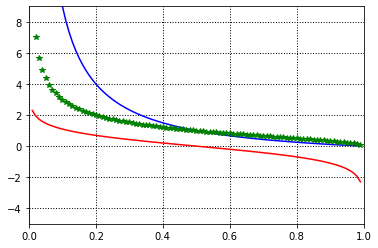

In [24]:
plt.plot(r, rt, "b")
plt.plot(r, a, "r")
plt.plot(r, w, "g*")
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axis([0.0, 1.0, -5.0, 9.0])

In [25]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [26]:
y_pred_ada = ada_clf.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred_ada)

0.9792

# Gradient Boosting

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost

In [29]:
X = 4*np.random.rand(200, 1) - 2
y = X**2 - 1 + 0.25*np.random.randn(200, 1)
y = y[:, 0]

(-2.0, 2.0, -3.0, 5.0)

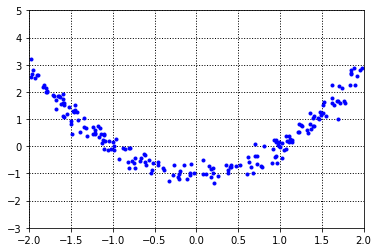

In [30]:
plt.plot(X, y, "b.")
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axis([-2.0, 2.0, -3.0, 5.0])

In [31]:
tree_reg1 = DecisionTreeRegressor(max_depth=4)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [32]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=4)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=4)

In [33]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=4)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=4)

In [34]:
X_arg = X[np.argsort(X, axis=None)]
y_arg = y[np.argsort(X, axis=None)]

In [35]:
y_pred_gra = sum(tree.predict(X_arg) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [36]:
mean_squared_error(y_pred_gra, y_arg)

0.040071076198578665

(-2.0, 2.0, -3.0, 5.0)

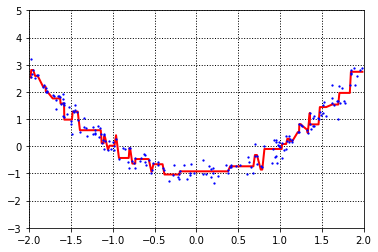

In [37]:
plt.plot(X_arg, y_pred_gra, "r-", linewidth=2)
plt.plot(X, y, "b.", markersize=2.5)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axis([-2.0, 2.0, -3.0, 5.0])

In [38]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [40]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [41]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

In [42]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=42)

(1.0, 120.0, 0.0, 1.0)

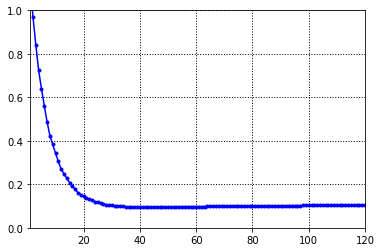

In [43]:
plt.plot(np.arange(1,121), errors, "b.-")
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axis([1, 120, 0.0, 1.0])

In [44]:
X_v = X_train[np.argsort(X_train, axis=None)]
y_v = y_train[np.argsort(X_train, axis=None)]

In [45]:
y_pred_val = gbrt_best.predict(X_v)

(-2.0, 2.0, -3.0, 5.0)

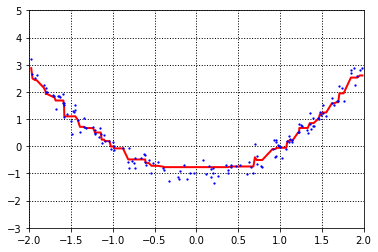

In [46]:
plt.plot(X_v, y_pred_val, "r-", linewidth=2)
plt.plot(X_v, y_v, "b.", markersize=2.5)
plt.grid(color='k', linestyle=':', linewidth=1)
plt.axis([-2.0, 2.0, -3.0, 5.0])

In [47]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

In [48]:
min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [49]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [50]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.85336
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.64554
[2]	validation_0-rmse:0.50470
[3]	validation_0-rmse:0.41195
[4]	validation_0-rmse:0.35734
[5]	validation_0-rmse:0.33006
[6]	validation_0-rmse:0.31508
[7]	validation_0-rmse:0.30911
[8]	validation_0-rmse:0.30972
[9]	validation_0-rmse:0.31349
Stopping. Best iteration:
[7]	validation_0-rmse:0.30911

